In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

colors = ['blue', 'pink', 'green', 'yellow', 'violet', 'orange']

df = pd.read_csv(r'C:\Users\User\Downloads\archive\shopping_trends.csv')
df.sample(5)

,Customer_ID,Age,Gender,Item_Purchased,Category,Purchase_Amount_(USD),Location,Size,Color,Season,Review_Rating,Subscription_Status,Payment_Method,Shipping_Type,Discount_Applied,Promo_Code_Used,Previous_Purchases,Preferred_Payment_Method,Frequency_of_Purchases
222,223,47,Male,Gloves,Accessories,94,New York,XL,Gray,Spring,4.5,Yes,Venmo,2-Day Shipping,Yes,Yes,14,PayPal,Fortnightly
1779,1780,29,Male,Scarf,Accessories,62,Virginia,M,Charcoal,Winter,4.3,No,Bank Transfer,Free Shipping,No,No,41,Venmo,Weekly
2599,2600,63,Male,Jewelry,Accessories,99,Vermont,M,Gold,Winter,3.4,No,Credit Card,Express,No,No,48,Credit Card,Monthly
2912,2913,48,Female,Shoes,Footwear,37,Oregon,M,Yellow,Winter,4.0,No,Cash,Standard,No,No,27,Cash,Bi-Weekly
356,357,56,Male,Pants,Clothing,80,Nevada,L,Black,Spring,3.8,Yes,Debit Card,Standard,Yes,Yes,27,Cash,Weekly


In [5]:
# look for datatypes
df.dtypes

Customer_ID                   int64
Age                           int64
Gender                       object
Item_Purchased               object
Category                     object
Purchase_Amount_(USD)         int64
Location                     object
Size                         object
Color                        object
Season                       object
Review_Rating               float64
Subscription_Status          object
Payment_Method               object
Shipping_Type                object
Discount_Applied             object
Promo_Code_Used              object
Previous_Purchases            int64
Preferred_Payment_Method     object
Frequency_of_Purchases       object
dtype: object

In [6]:
# shape of dataset
df.shape

(3900, 19)

In [7]:
# check number of columns in the dataset
df.columns

Index(['Customer_ID', 'Age', 'Gender', 'Item_Purchased', 'Category',
       'Purchase_Amount_(USD)', 'Location', 'Size', 'Color', 'Season',
       'Review_Rating', 'Subscription_Status', 'Payment_Method',
       'Shipping_Type', 'Discount_Applied', 'Promo_Code_Used',
       'Previous_Purchases', 'Preferred_Payment_Method',
       'Frequency_of_Purchases'],
      dtype='object')

In [8]:
# information about the dataset; check also for nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item_Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase_Amount_(USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review_Rating             3900 non-null   float64
 11  Subscription_Status       3900 non-null   object 
 12  Payment_Method            3900 non-null   object 
 13  Shipping_Type             3900 non-null   object 
 14  Discount

In [9]:
# check if there are null values present in the dataset
df.isnull().sum()

Customer_ID                 0
Age                         0
Gender                      0
Item_Purchased              0
Category                    0
Purchase_Amount_(USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review_Rating               0
Subscription_Status         0
Payment_Method              0
Shipping_Type               0
Discount_Applied            0
Promo_Code_Used             0
Previous_Purchases          0
Preferred_Payment_Method    0
Frequency_of_Purchases      0
dtype: int64

In [10]:
# check for duplicates
df.duplicated().sum()

0

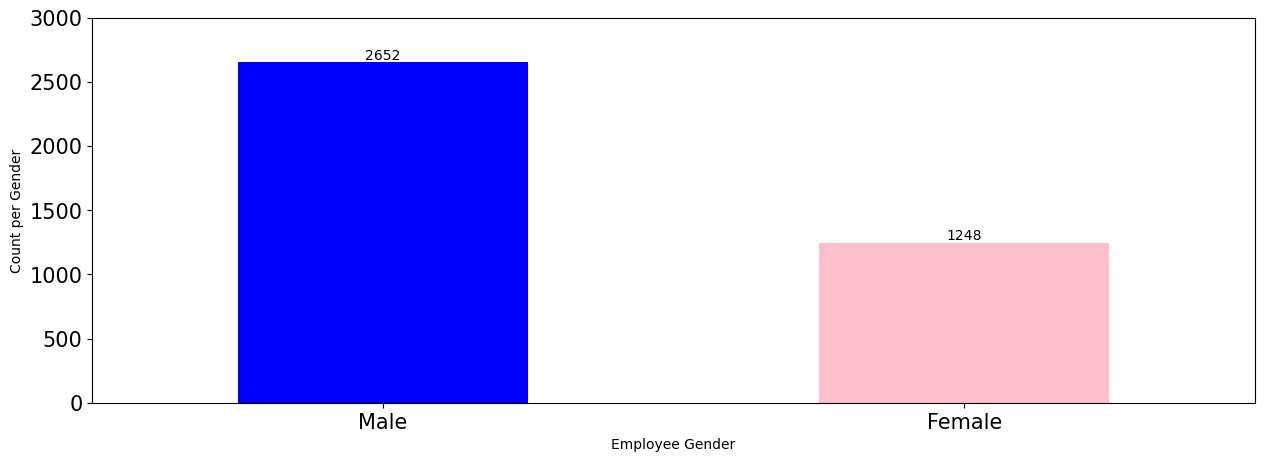

In [11]:
# bar graph for the number of Male and Female
plt.figure(figsize = (15, 5))
axes = df["Gender"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
axes.set_xticklabels(('Male', 'Female'))

for p in axes.patches:
    axes.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    axes.tick_params(axis = 'both', labelsize = 15)

plt.ylim(0, 3000)    
plt.xlabel('Employee Gender')
plt.ylabel('Count per Gender')
plt.show()

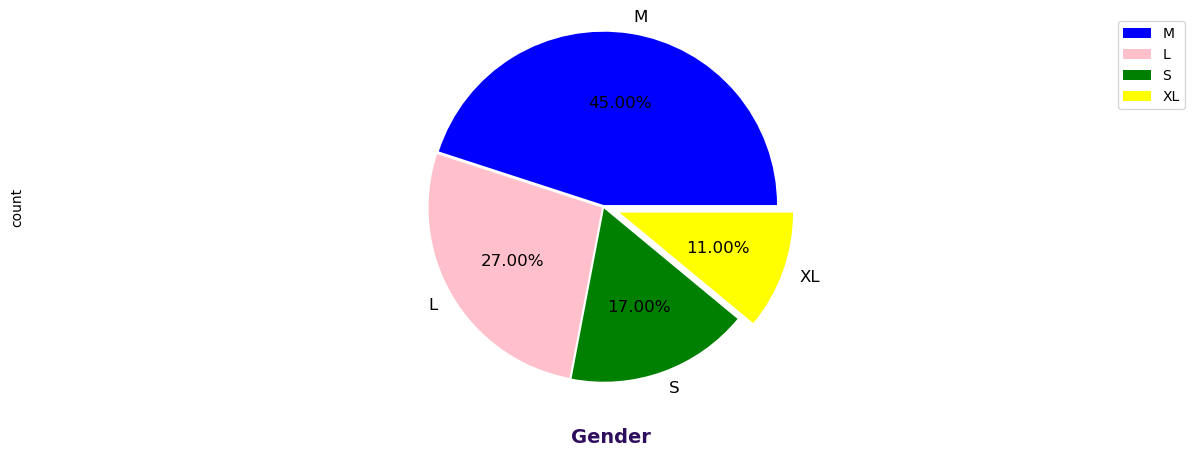

In [12]:
# percentage of sizes in the dataset; pie chart
plt.figure(figsize = (15, 5))

counts = df["Size"].value_counts()
explode = (0.01, 0.01, 0.01, 0.1)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.2f%%')
plt.xlabel('Gender', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

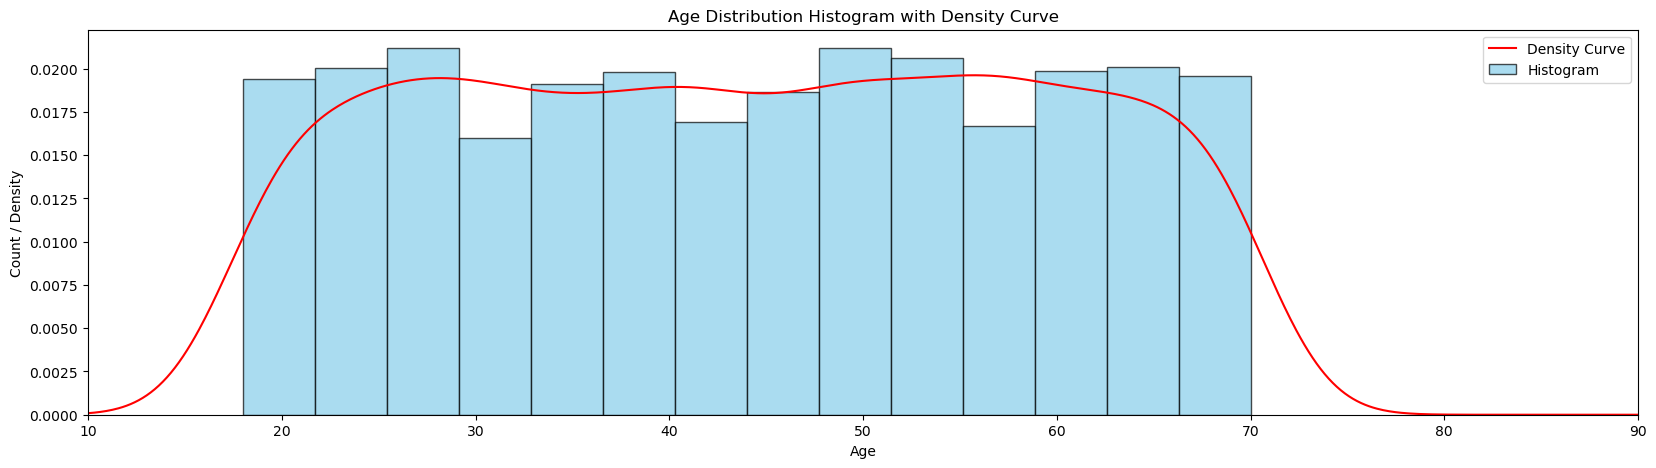

In [2]:
# histogram of age from dataset

fig, ax = plt.subplots(figsize = (20, 5))

ax.hist(df['Age'], bins = 14, edgecolor = 'black', alpha = 0.7, color = 'skyblue', density = True)
df['Age'].plot(kind = 'kde', color = 'red', ax = ax)

ax.set_xlabel('Age')
ax.set_ylabel('Count / Density')
ax.set_title('Age Distribution Histogram with Density Curve')
ax.legend(['Density Curve', 'Histogram'])
plt.xlim(10, 90)
plt.show()

In [14]:
df['Category'].value_counts()

Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64

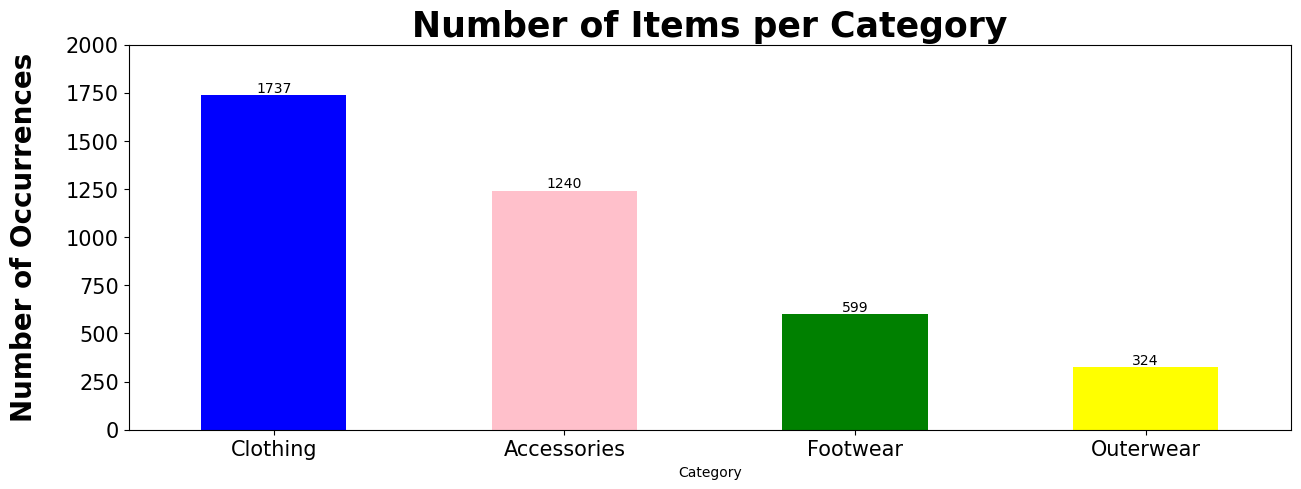

In [3]:
plt.figure(figsize = (15, 5))
axes = df["Category"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
axes.set_xticklabels(('Clothing', 'Accessories', 'Footwear', 'Outerwear'))

for p in axes.patches:
    axes.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    axes.tick_params(axis = 'both', labelsize = 15)
    
plt.ylim(0, 2000)
#plt.xlabel('Employment Type', weight = "bold", color = "black", fontsize = 20, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "black", fontsize = 20, labelpad = 20)
plt.title('Number of Items per Category', weight = "bold", color = "black", fontsize = 25)
plt.show()

In [17]:
# look the data in column 'item purchased'
df['Item_Purchased'].value_counts()

Item_Purchased
Blouse        171
Jewelry       171
Pants         171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Belt          161
Sunglasses    161
Coat          161
Sandals       160
Socks         159
Skirt         158
Shorts        157
Scarf         157
Hat           154
Handbag       153
Hoodie        151
Shoes         150
T-shirt       147
Sneakers      145
Boots         144
Backpack      143
Gloves        140
Jeans         124
Name: count, dtype: int64

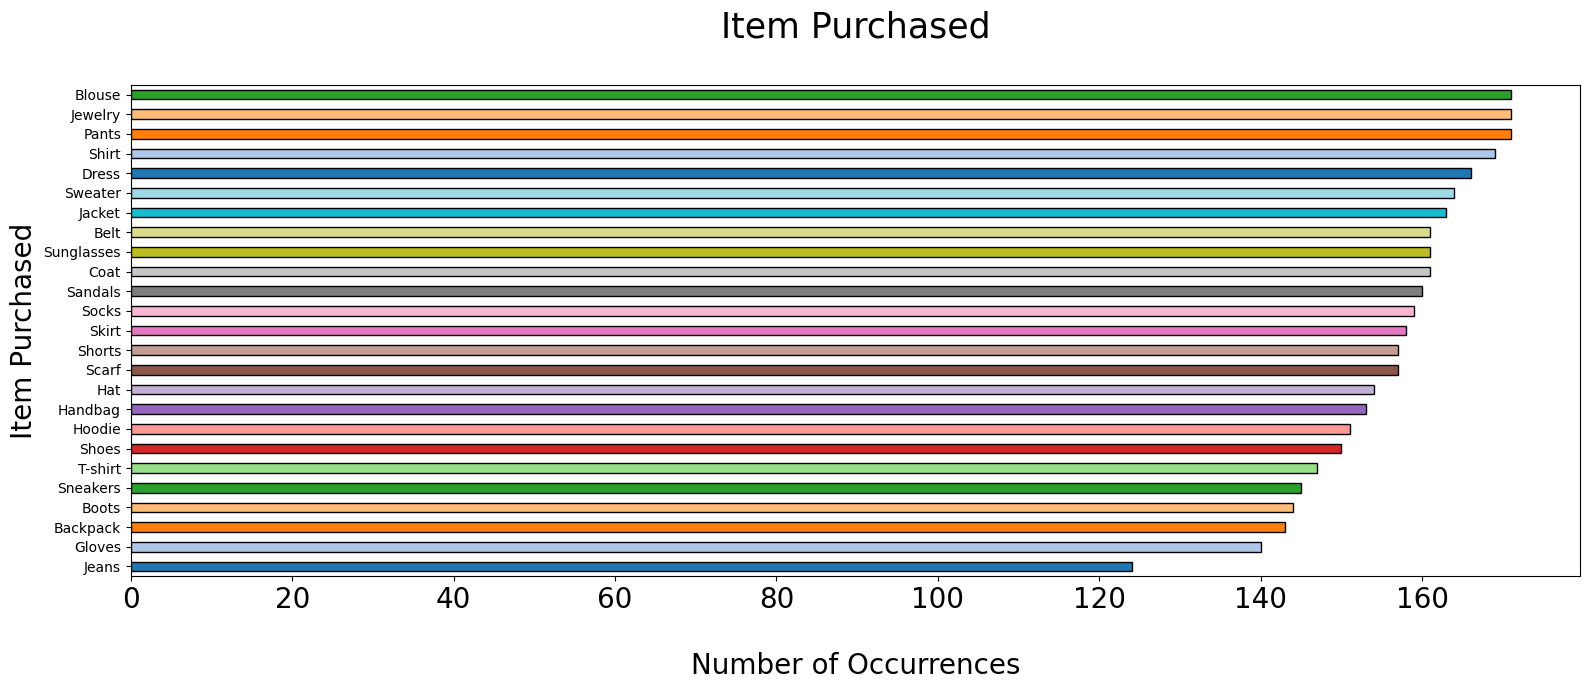

In [18]:
# horizontal bar graph for data in 'item purchased' column

plt.figure(figsize = (16, 7))
df["Item_Purchased"].value_counts().sort_values(ascending = True).plot(kind = 'barh', color = sns.color_palette('tab20'), edgecolor = 'black')
plt.ylabel('Item Purchased', fontsize = 20)
plt.xlabel('\nNumber of Occurrences', fontsize = 20)
plt.title('Item Purchased\n', fontsize = 25)
plt.xticks(rotation = 0, ha = 'center', fontsize = 20)
plt.tight_layout()
plt.show()

In [19]:
# look for data in 'location' column
df["Location"].value_counts()

Location
Montana           96
California        95
Idaho             93
Illinois          92
Alabama           89
Minnesota         88
Nebraska          87
New York          87
Nevada            87
Maryland          86
Delaware          86
Vermont           85
Louisiana         84
North Dakota      83
Missouri          81
West Virginia     81
New Mexico        81
Mississippi       80
Indiana           79
Georgia           79
Kentucky          79
Arkansas          79
North Carolina    78
Connecticut       78
Virginia          77
Ohio              77
Tennessee         77
Texas             77
Maine             77
South Carolina    76
Colorado          75
Oklahoma          75
Wisconsin         75
Oregon            74
Pennsylvania      74
Washington        73
Michigan          73
Alaska            72
Massachusetts     72
Wyoming           71
Utah              71
New Hampshire     71
South Dakota      70
Iowa              69
Florida           68
New Jersey        67
Hawaii            65
Ariz

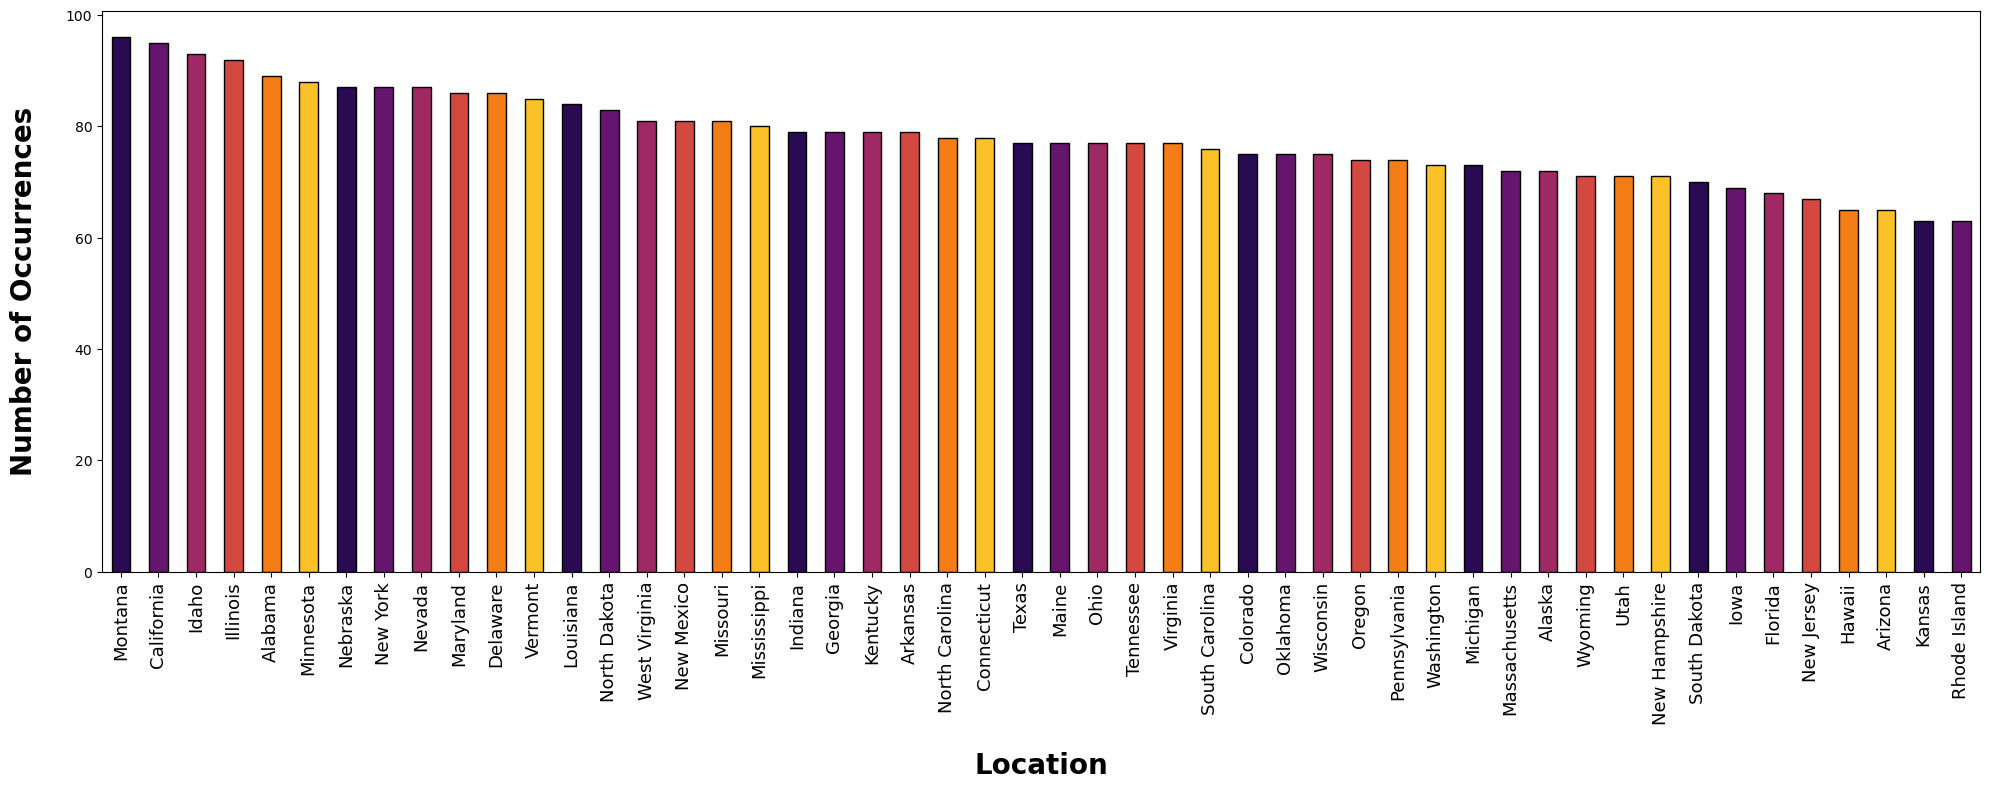

In [11]:
plt.figure(figsize = (20, 8))
df["Location"].value_counts().sort_values(ascending = False).plot(kind = 'bar', color = sns.color_palette('inferno'), edgecolor = 'black')
plt.xlabel('Location', weight = "bold", color = "black", fontsize = 20, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "black", fontsize = 20, labelpad = 20);
plt.xticks(rotation = 90, ha = 'center', fontsize = 13)
plt.tight_layout()
plt.show()

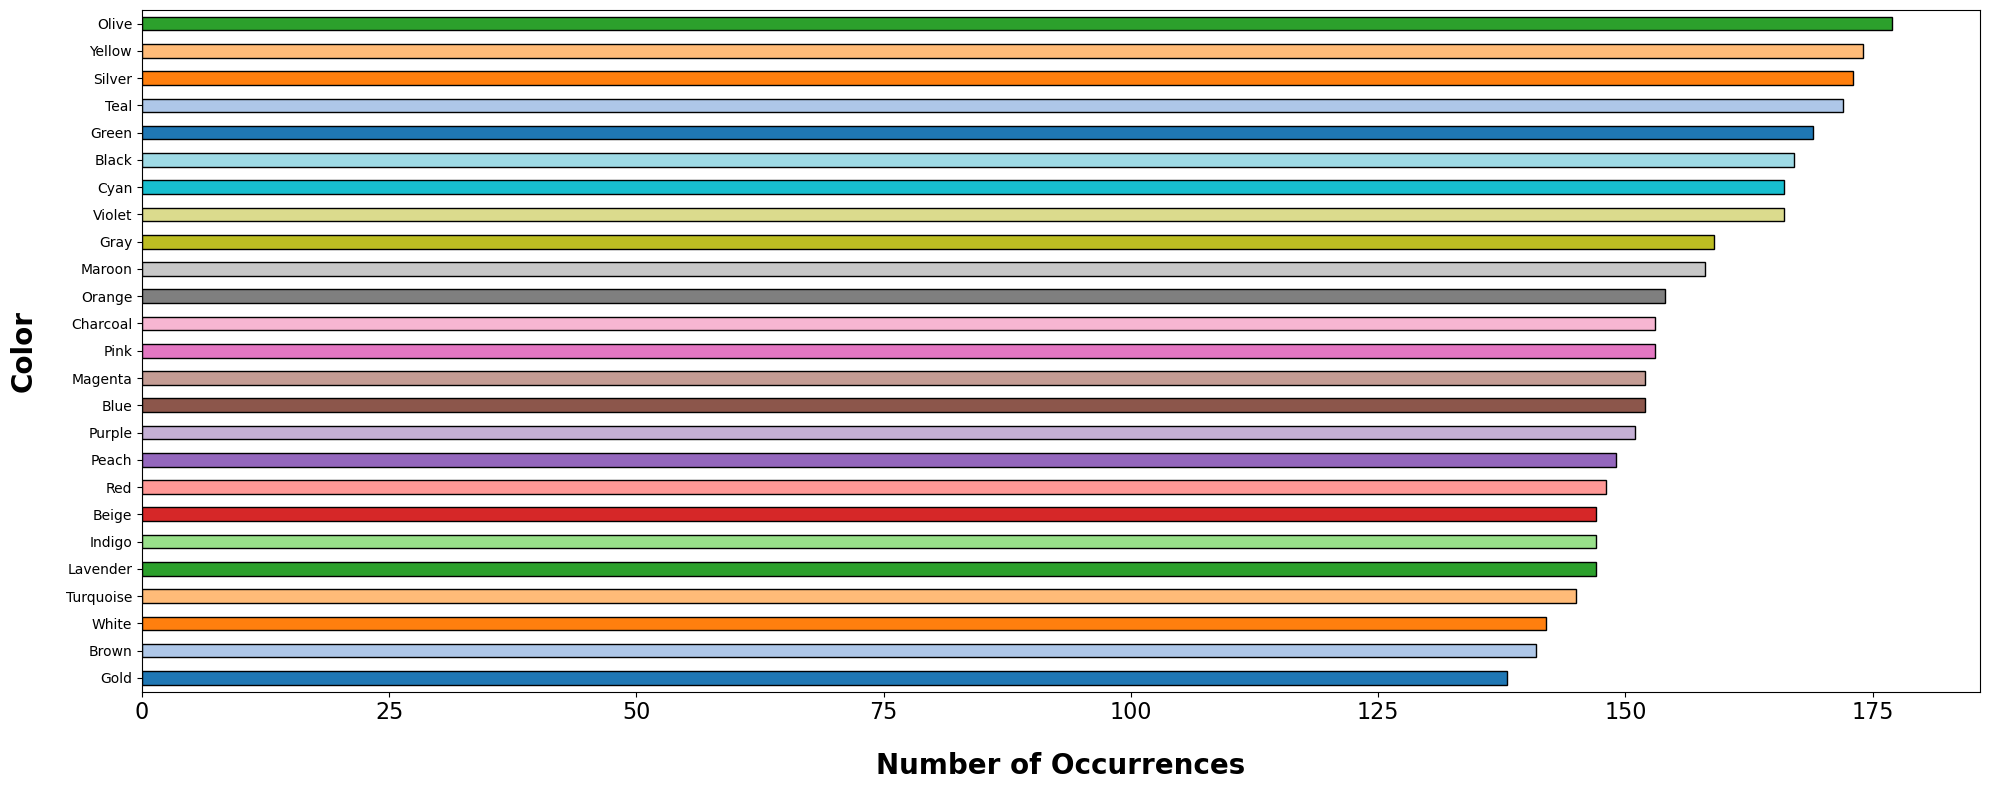

In [4]:
# horizontal bar graph of column 'color'

plt.figure(figsize = (20, 8))
df["Color"].value_counts().sort_values(ascending = True).plot(kind = 'barh', color = sns.color_palette('tab20'), edgecolor = 'black')
plt.xlabel('Number of Occurrences', weight = "bold", color = "black", fontsize = 20, labelpad = 20)
plt.ylabel('Color', weight = "bold", color = "black", fontsize = 20, labelpad = 20);
plt.xticks(rotation = 0, ha = 'center', fontsize = 16)
plt.tight_layout()
plt.show()

In [22]:
# look for data in column 'season'
df['Season'].value_counts()

Season
Spring    999
Fall      975
Winter    971
Summer    955
Name: count, dtype: int64

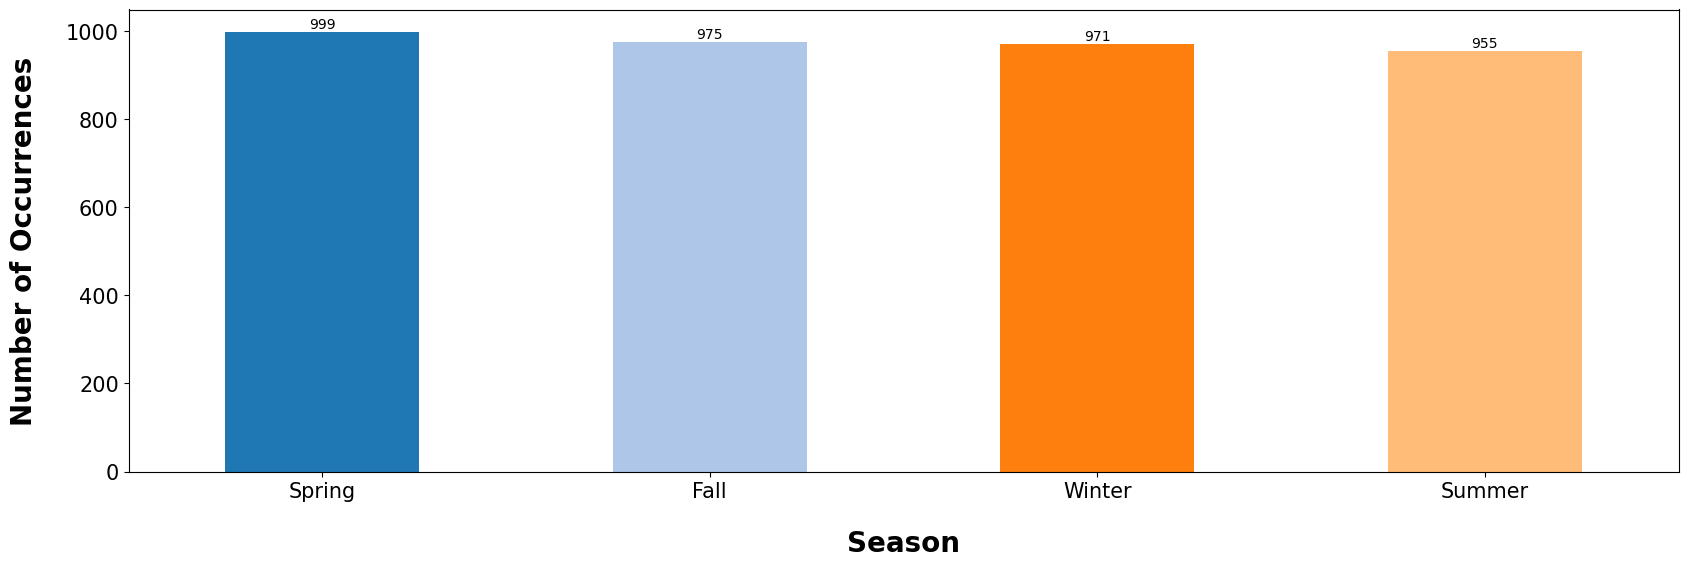

In [160]:
plt.figure(figsize = (20, 6))
ax = df["Season"].value_counts().plot(kind = 'bar', color = sns.color_palette('tab20'), rot = 0)
ax.set_xticklabels(('Spring', 'Fall', 'Winter', 'Summer'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Season', weight = "bold", color = "black", fontsize = 20, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "black", fontsize = 20, labelpad = 20)
plt.show()

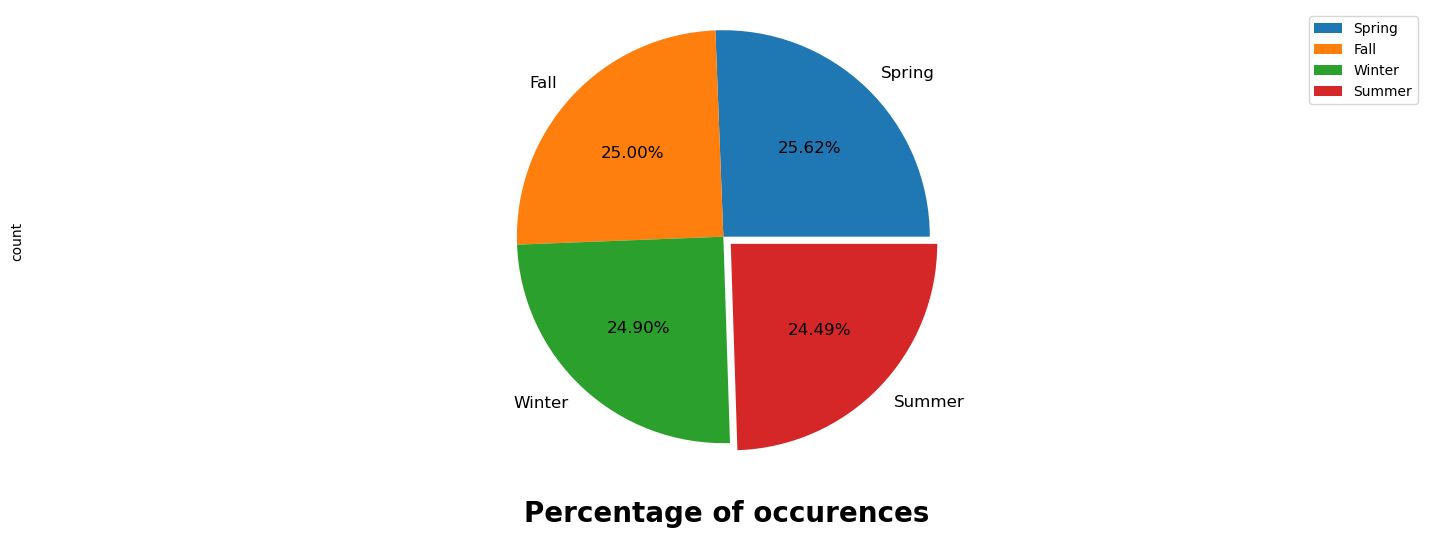

In [23]:
# pie chart visualization of occurences in 'season' column

plt.figure(figsize = (18, 6))

counts = df["Season"].value_counts()
explode = (0, 0, 0, 0.05)

counts.plot(kind = 'pie', fontsize = 12, colors = sns.color_palette('tab10'), explode = explode, autopct = '%1.2f%%')
plt.xlabel('Percentage of occurences', weight = "bold", color = "black", fontsize = 20, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

In [25]:
# subscription status 
df['Subscription_Status'].value_counts()

Subscription_Status
No     2847
Yes    1053
Name: count, dtype: int64

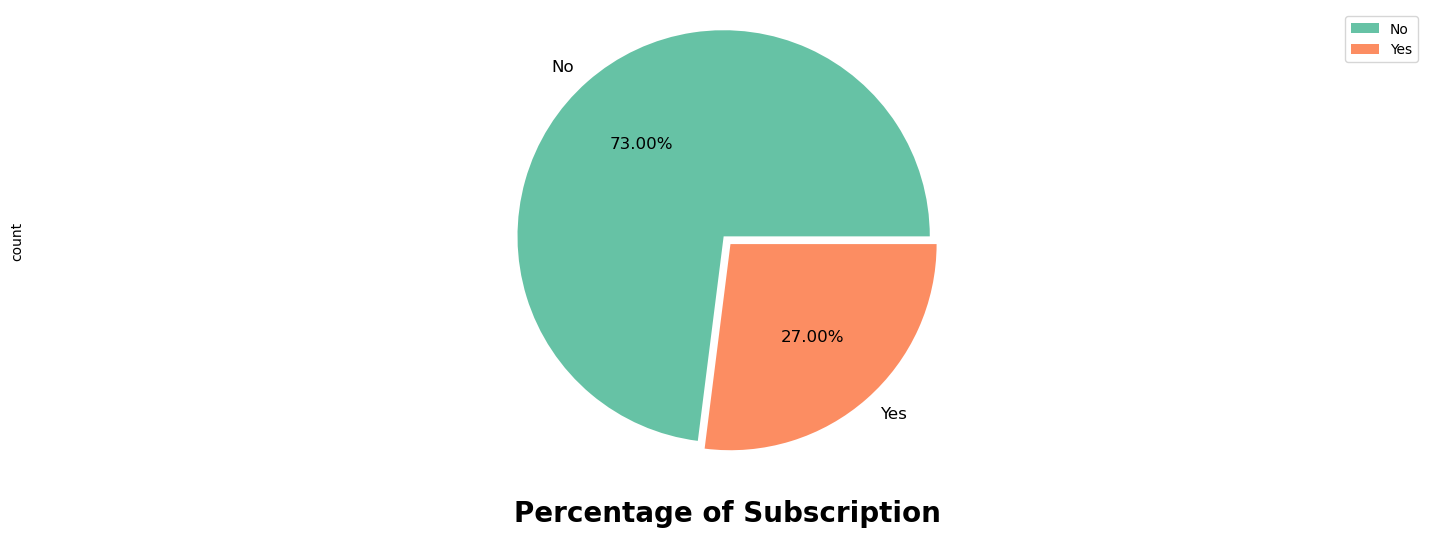

In [26]:
# pie chart for 'subscription status' column

plt.figure(figsize = (18, 6))

counts = df["Subscription_Status"].value_counts()
explode = (0, 0.05)

counts.plot(kind = 'pie', fontsize = 12, colors = sns.color_palette("Set2"), explode = explode, autopct = '%1.2f%%')
plt.xlabel('Percentage of Subscription', weight = "bold", color = "black", fontsize = 20, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

In [27]:
# 'payment method' column bar graph visualization
df['Payment_Method'].value_counts()

Payment_Method
Credit Card      696
Venmo            653
Cash             648
PayPal           638
Debit Card       633
Bank Transfer    632
Name: count, dtype: int64

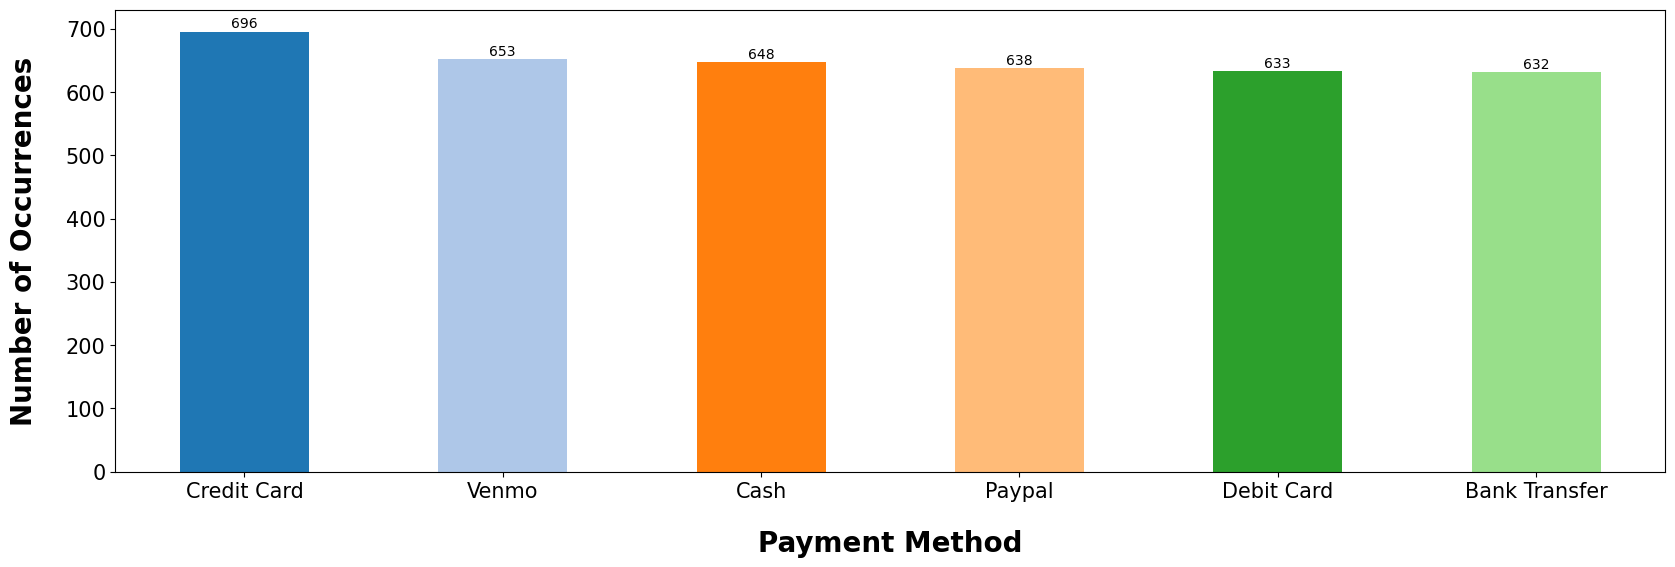

In [28]:
# bar graph of 'payment method' column

plt.figure(figsize = (20, 6))
ax = df["Payment_Method"].value_counts().plot(kind = 'bar', color = sns.color_palette('tab20'), rot = 0)
ax.set_xticklabels(('Credit Card', 'Venmo', 'Cash', 'Paypal', 'Debit Card', 'Bank Transfer'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Payment Method', weight = "bold", color = "black", fontsize = 20, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "black", fontsize = 20, labelpad = 20);
plt.show()

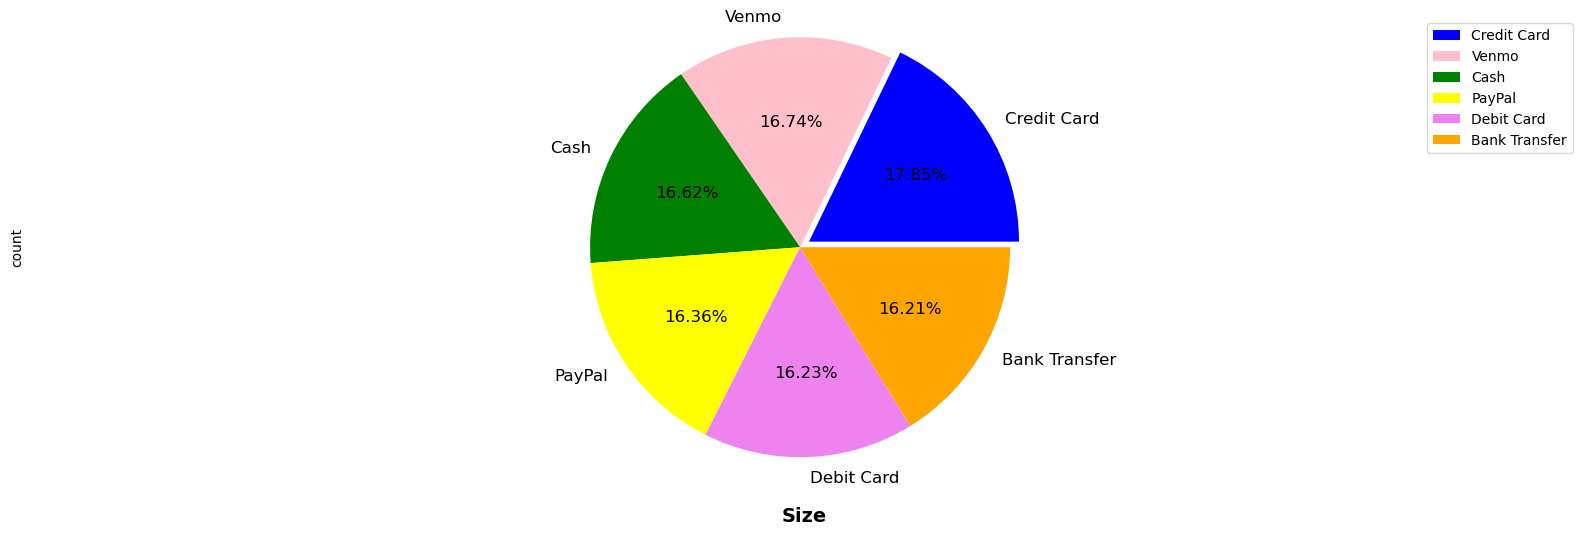

In [29]:
# 'payment method' column in pie chart visualization

plt.figure(figsize = (20, 6))

counts = df["Payment_Method"].value_counts()
explode = (0.05, 0, 0, 0, 0.0, 0)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.2f%%')
plt.xlabel('Size', weight = "bold", color = "black", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

In [30]:
# 'shipping type' column 
df['Shipping_Type'].value_counts()

Shipping_Type
Free Shipping     675
Standard          654
Store Pickup      650
Next Day Air      648
Express           646
2-Day Shipping    627
Name: count, dtype: int64

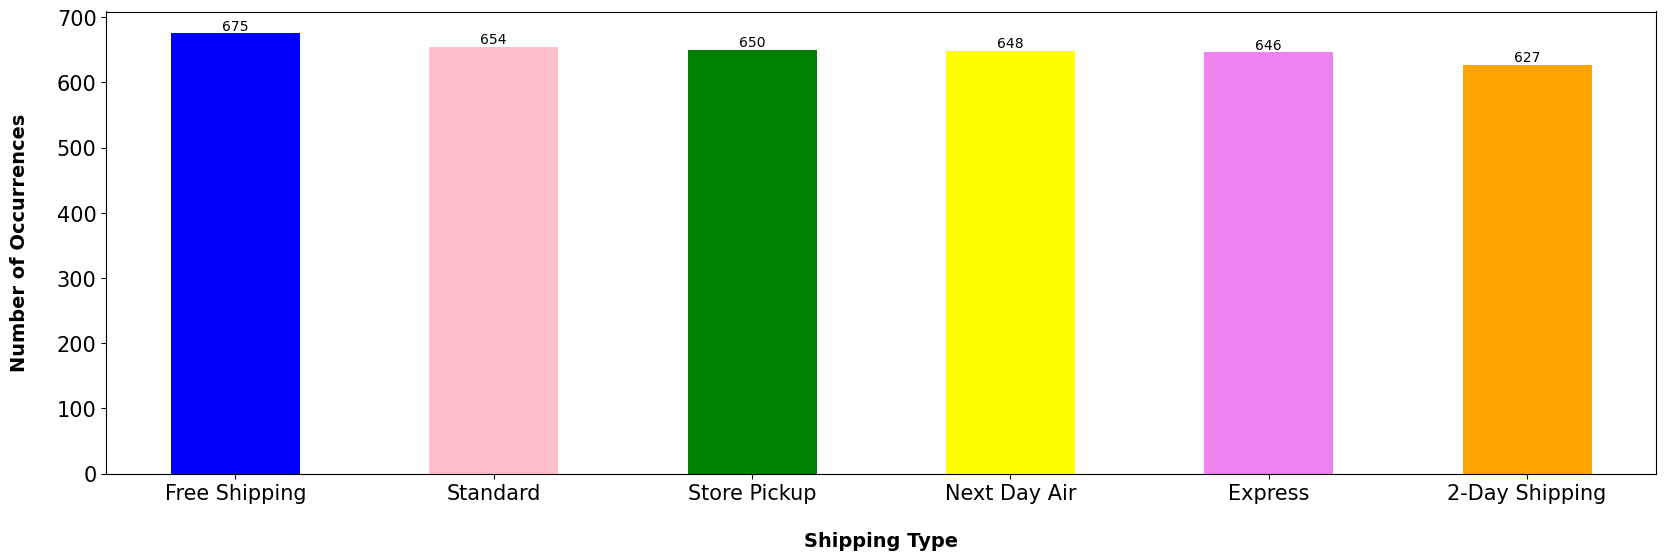

In [31]:
# bar graph visualization of 'shipping type' column

plt.figure(figsize = (20, 6))
ax = df["Shipping_Type"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('Free Shipping', 'Standard', 'Store Pickup', 'Next Day Air', 'Express', '2-Day Shipping'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Shipping Type', weight = "bold", color = "black", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "black", fontsize = 14, labelpad = 20)
plt.show()

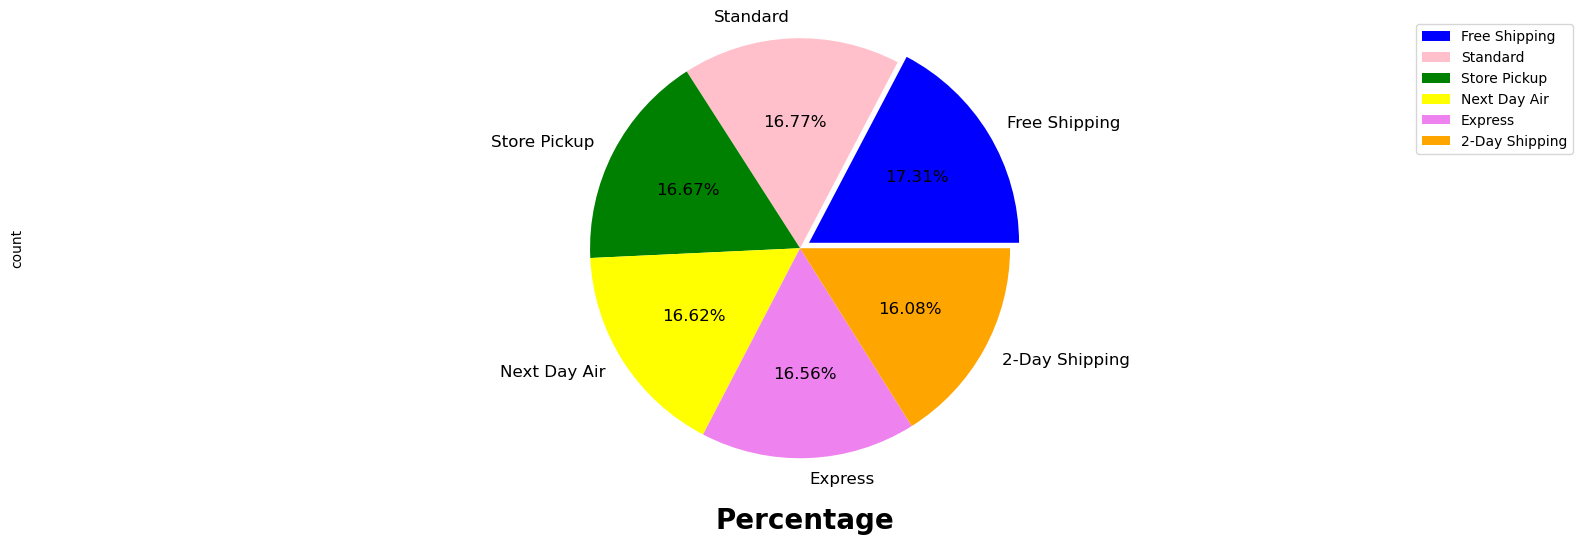

In [32]:
# pie chart visualization of 'shipping type' column

plt.figure(figsize = (20, 6))

counts = df["Shipping_Type"].value_counts()
explode = (0.05, 0, 0, 0, 0.0, 0)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.2f%%')
plt.xlabel('Percentage', weight = "bold", color = "black", fontsize = 20, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

In [33]:
# looking the data in this column
df['Frequency_of_Purchases'].value_counts()

Frequency_of_Purchases
Every 3 Months    584
Annually          572
Quarterly         563
Monthly           553
Bi-Weekly         547
Fortnightly       542
Weekly            539
Name: count, dtype: int64

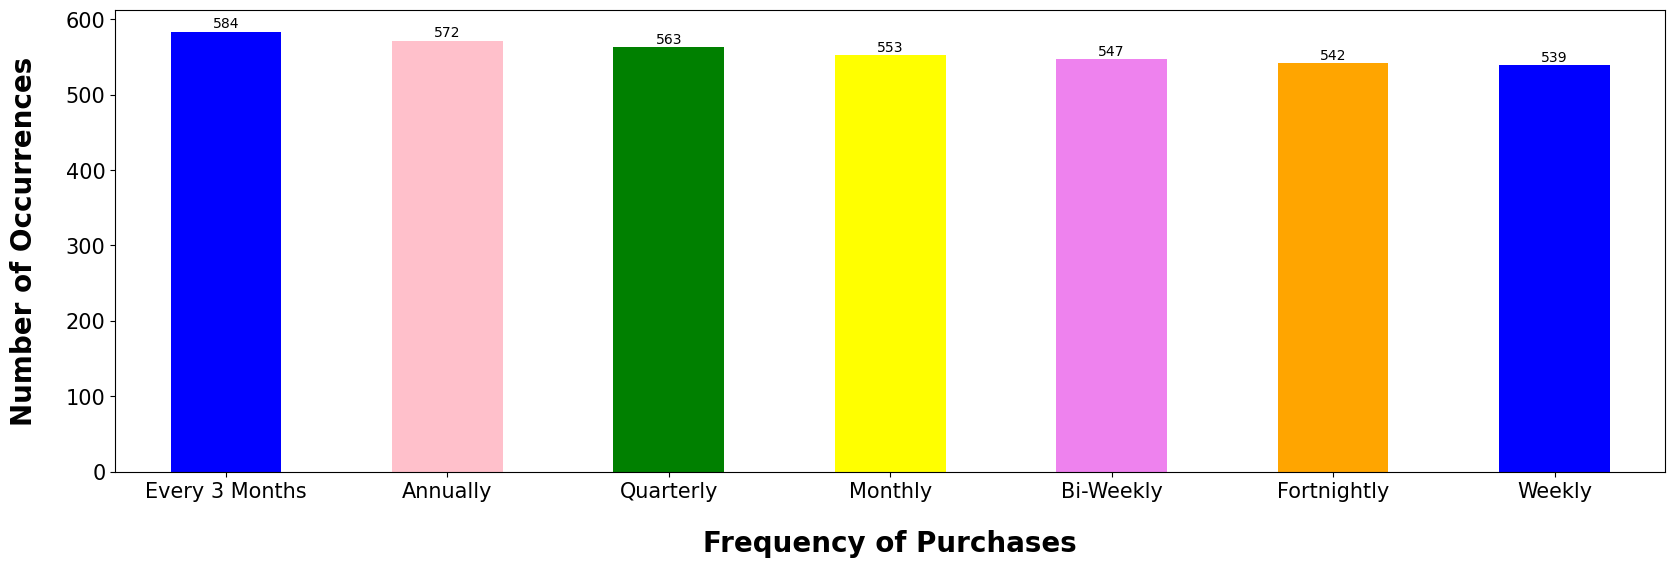

In [34]:
# bar graph visualization of 'frequency of purchases' column
plt.figure(figsize = (20, 6))
ax = df["Frequency_of_Purchases"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('Every 3 Months', 'Annually', 'Quarterly', 'Monthly', 'Bi-Weekly', 'Fortnightly', 'Weekly'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Frequency of Purchases', weight = "bold", color = "black", fontsize = 20, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "black", fontsize = 20, labelpad = 20)
plt.show()

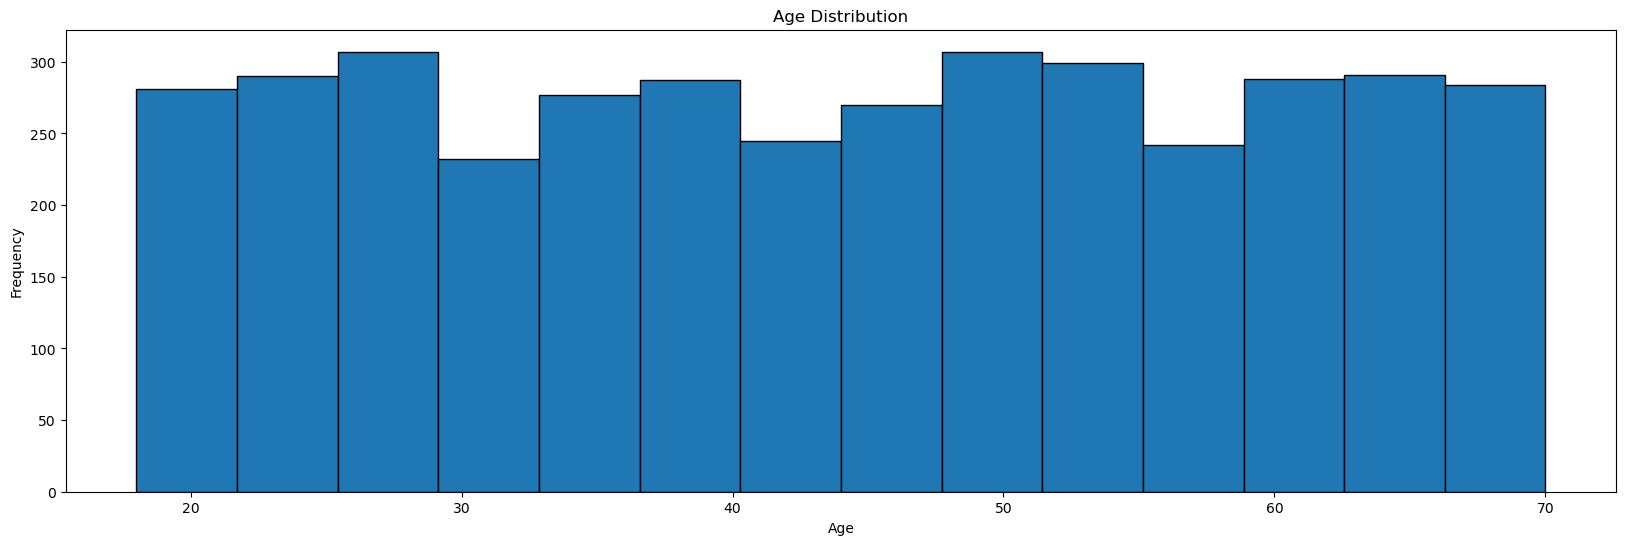

In [2]:
# histogram visuaization of age distribution
plt.figure(figsize = (20, 6))
plt.hist(df['Age'], bins = 14, edgecolor = 'black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

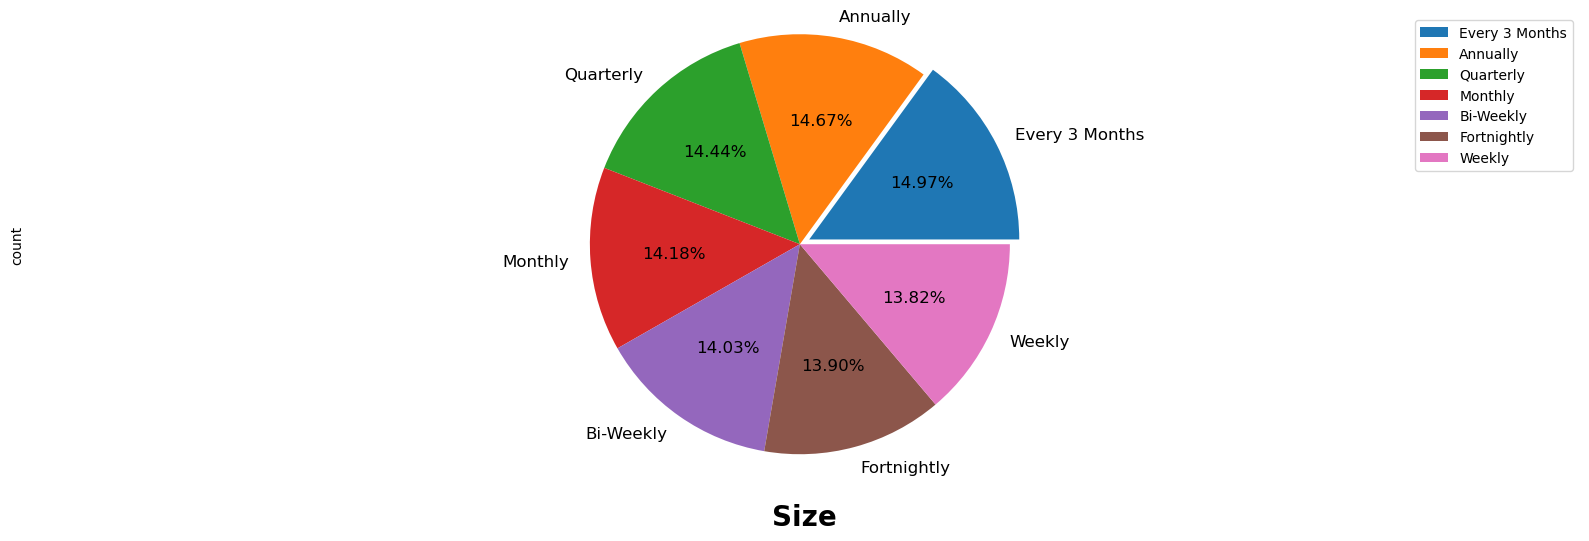

In [3]:
# pie chart of 'frequencyOfPurchase' column

plt.figure(figsize = (20, 6))

counts = df["Frequency_of_Purchases"].value_counts()
explode = (0.05, 0, 0, 0, 0.0, 0, 0)

counts.plot(kind = 'pie', fontsize = 12, colors = sns.color_palette('tab10'), explode = explode, autopct = '%1.2f%%')
plt.xlabel('Size', weight = "bold", color = "black", fontsize = 20, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

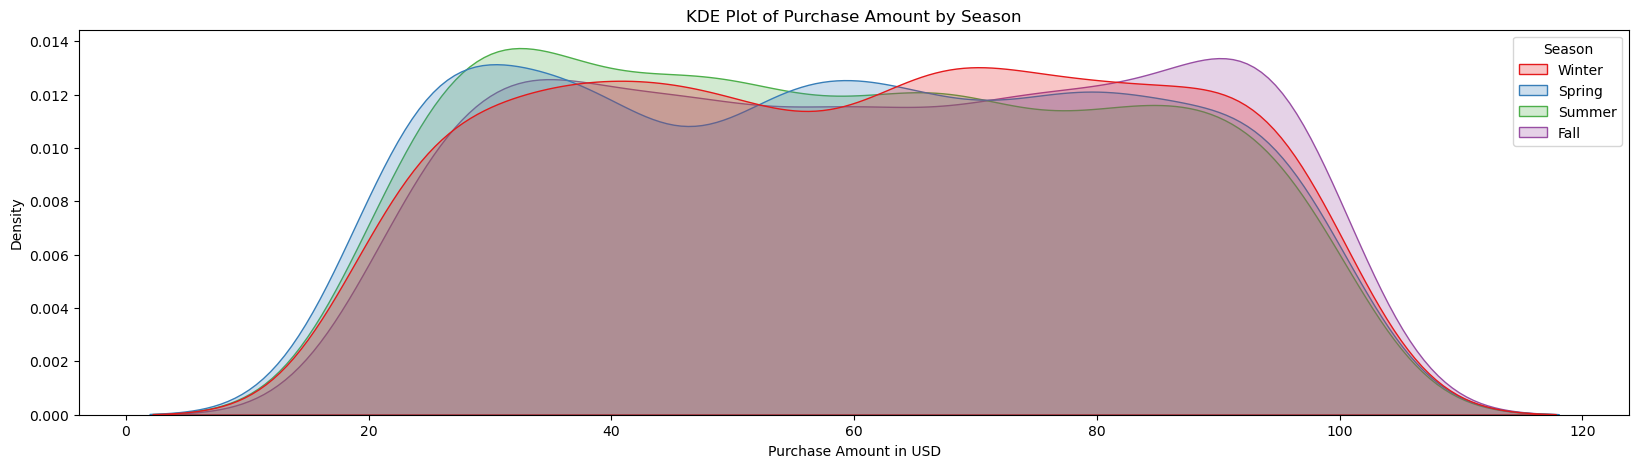

In [37]:
#KDE plot for purchase amount by season
plt.figure(figsize=(20, 5))
sns.kdeplot(data = df, x = 'Purchase_Amount_(USD)', hue = 'Season', common_norm = False, fill = True, palette = 'Set1')
plt.title('KDE Plot of Purchase Amount by Season')
plt.xlabel('Purchase Amount in USD')
plt.show()

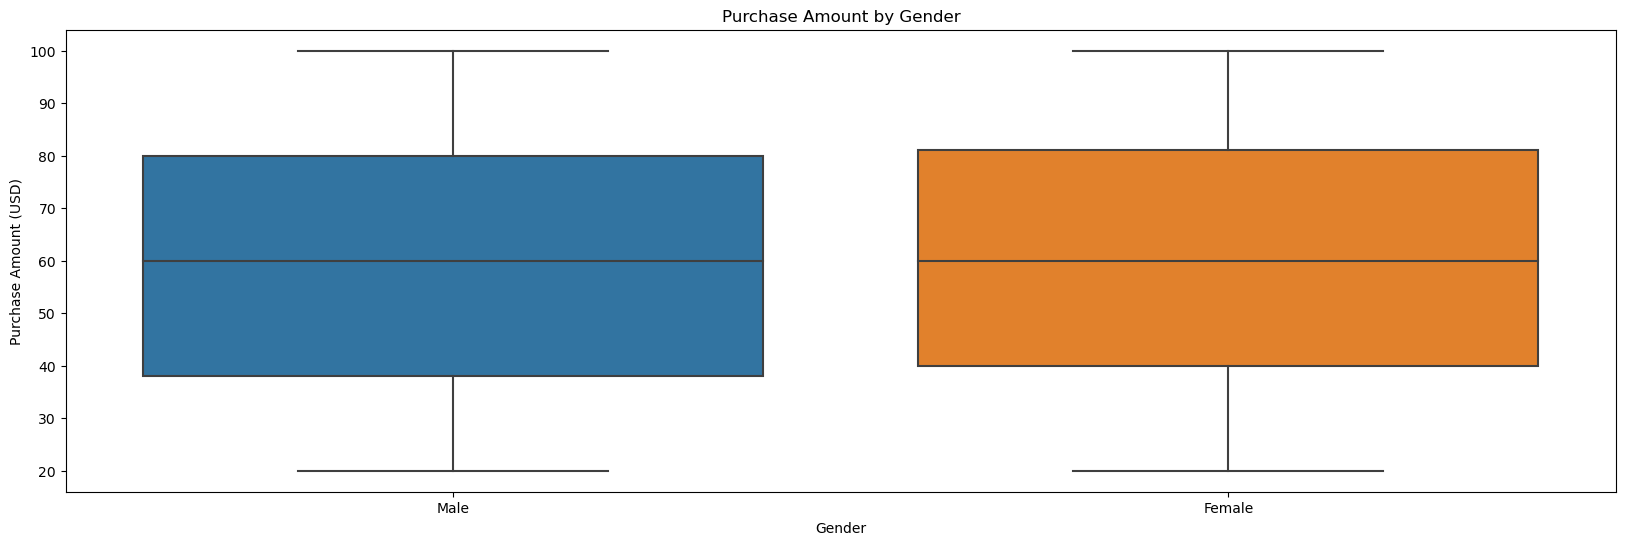

In [38]:
# box plot of purchase amount by gender
plt.figure(figsize = (20, 6))
sns.boxplot(x='Gender', y='Purchase_Amount_(USD)', data=df)
plt.title('Purchase Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Purchase Amount (USD)')
plt.show()

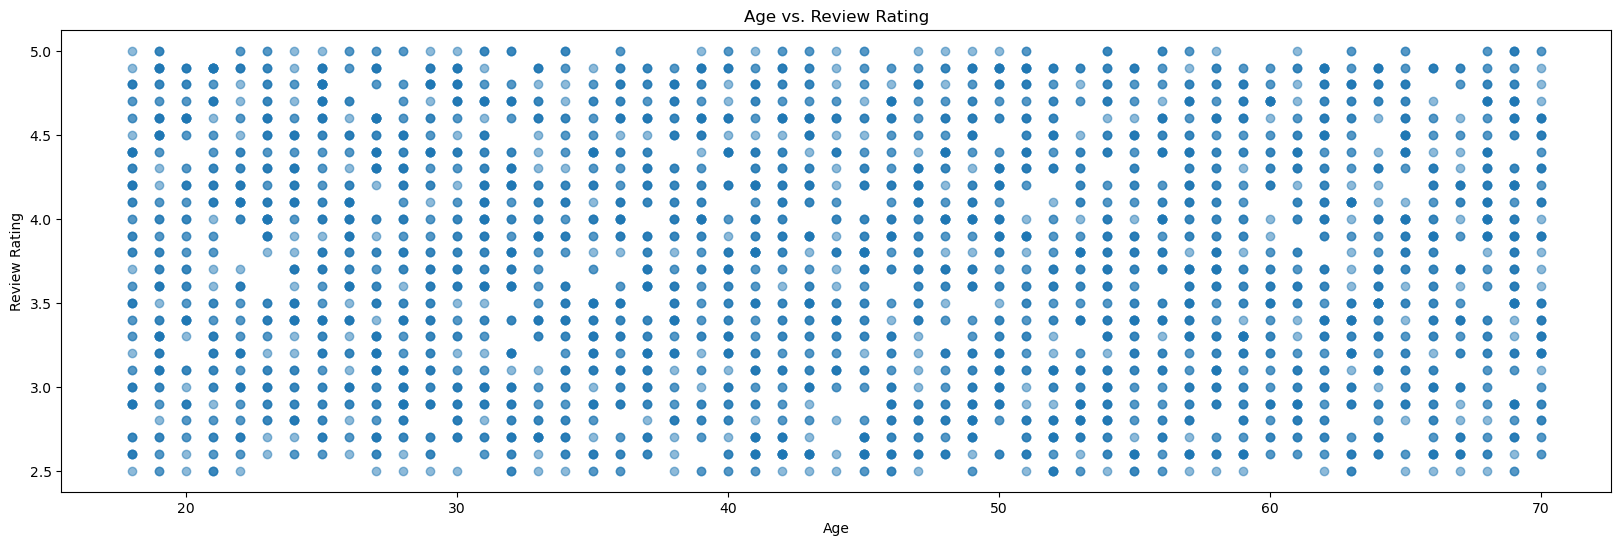

In [39]:
# scatter plot of age vs review rating
plt.figure(figsize = (20, 6))
plt.scatter(df['Age'], df['Review_Rating'], alpha=0.5)
plt.title('Age vs. Review Rating')
plt.xlabel('Age')
plt.ylabel('Review Rating')
plt.show()

<Figure size 2000x600 with 0 Axes>

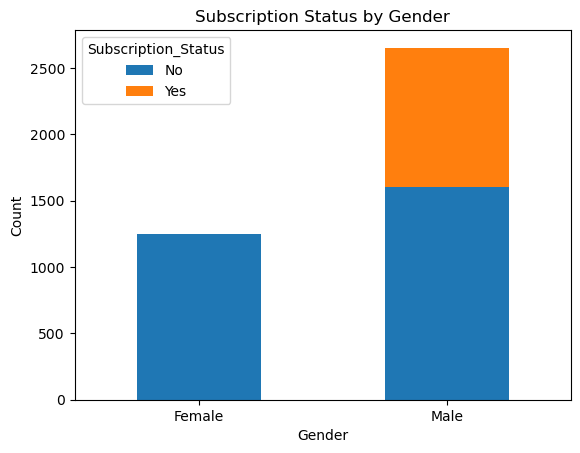

In [6]:
# stacked bar chart 
subscription_gender_counts = df.groupby(['Gender', 'Subscription_Status']).size().unstack()
plt.figure(figsize = (20, 6))
subscription_gender_counts.plot(kind='bar', stacked=True, rot = 0);
plt.title('Subscription Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

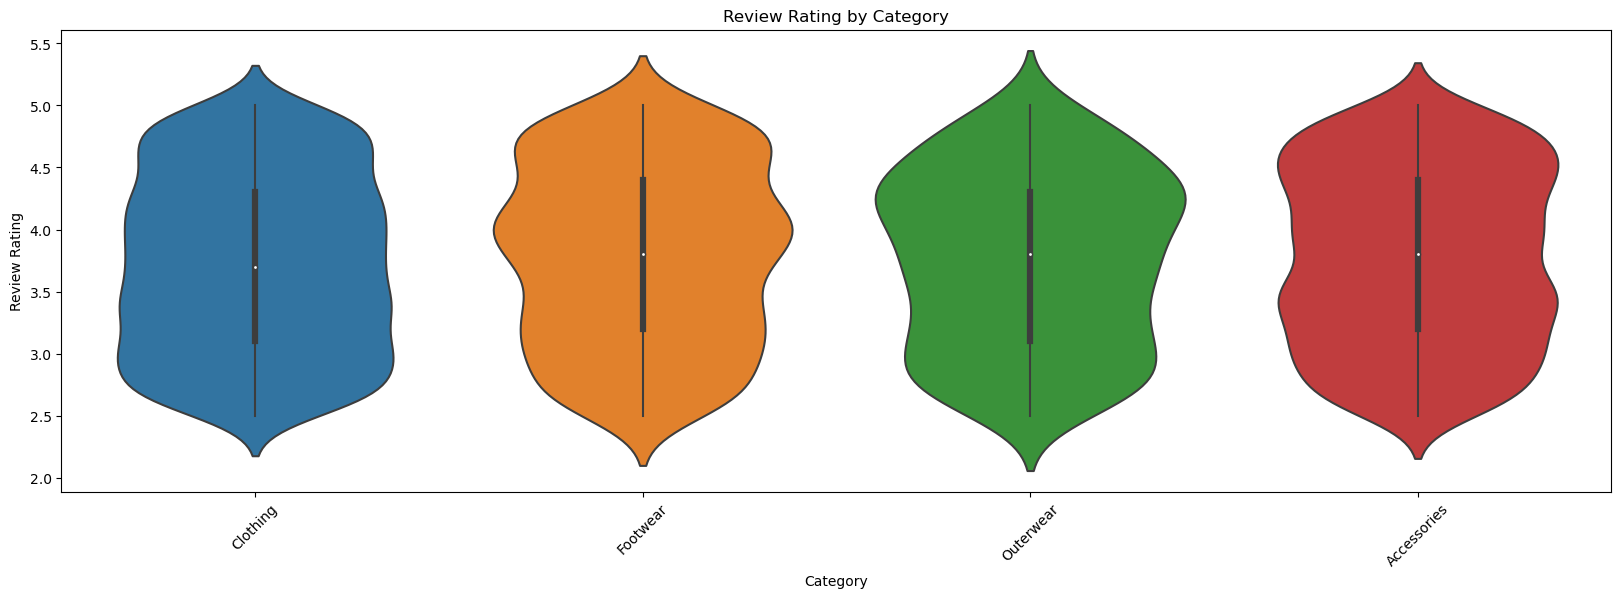

In [41]:
# violin plot of review rating by category
plt.figure(figsize=(20, 6))
sns.violinplot(x='Category', y='Review_Rating', data=df)
plt.title('Review Rating by Category')
plt.xlabel('Category')
plt.ylabel('Review Rating')
plt.xticks(rotation=45)
plt.show()

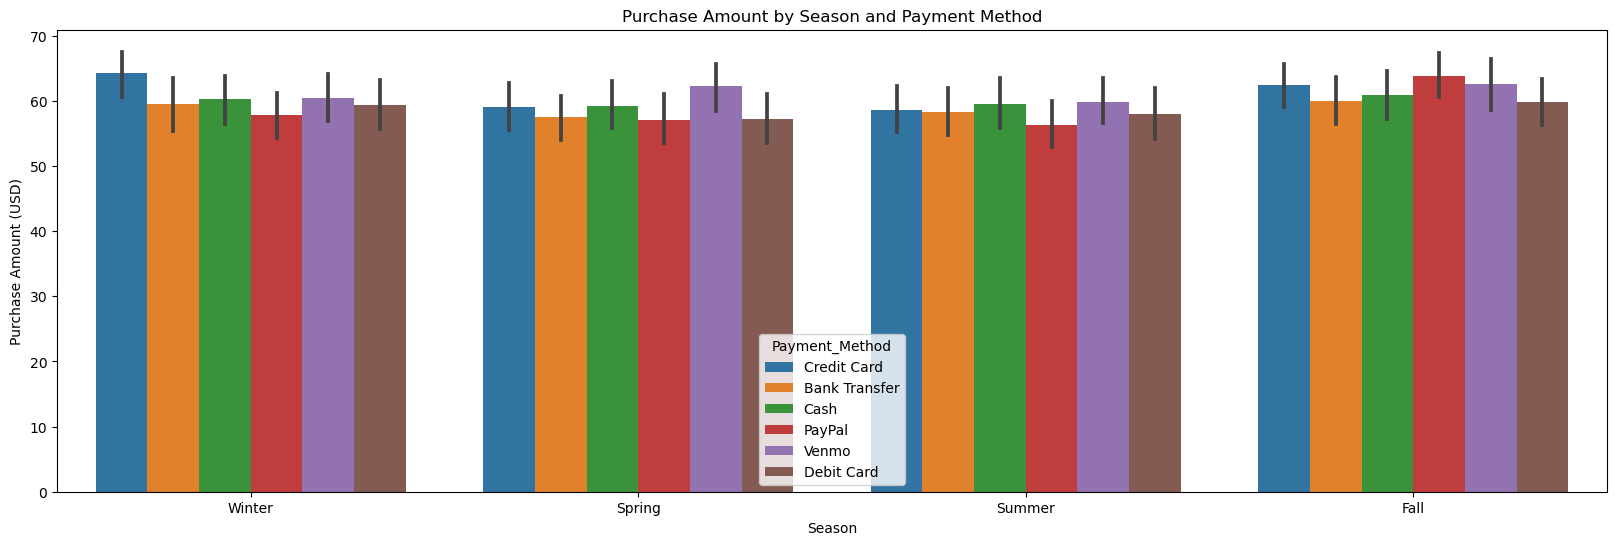

In [42]:
# bar plot of payment method by season
plt.figure(figsize=(20, 6))
sns.barplot(x='Season', y='Purchase_Amount_(USD)', hue='Payment_Method', data=df)
plt.title('Purchase Amount by Season and Payment Method')
plt.xlabel('Season')
plt.ylabel('Purchase Amount (USD)')
plt.xticks(rotation = 0)
plt.show()

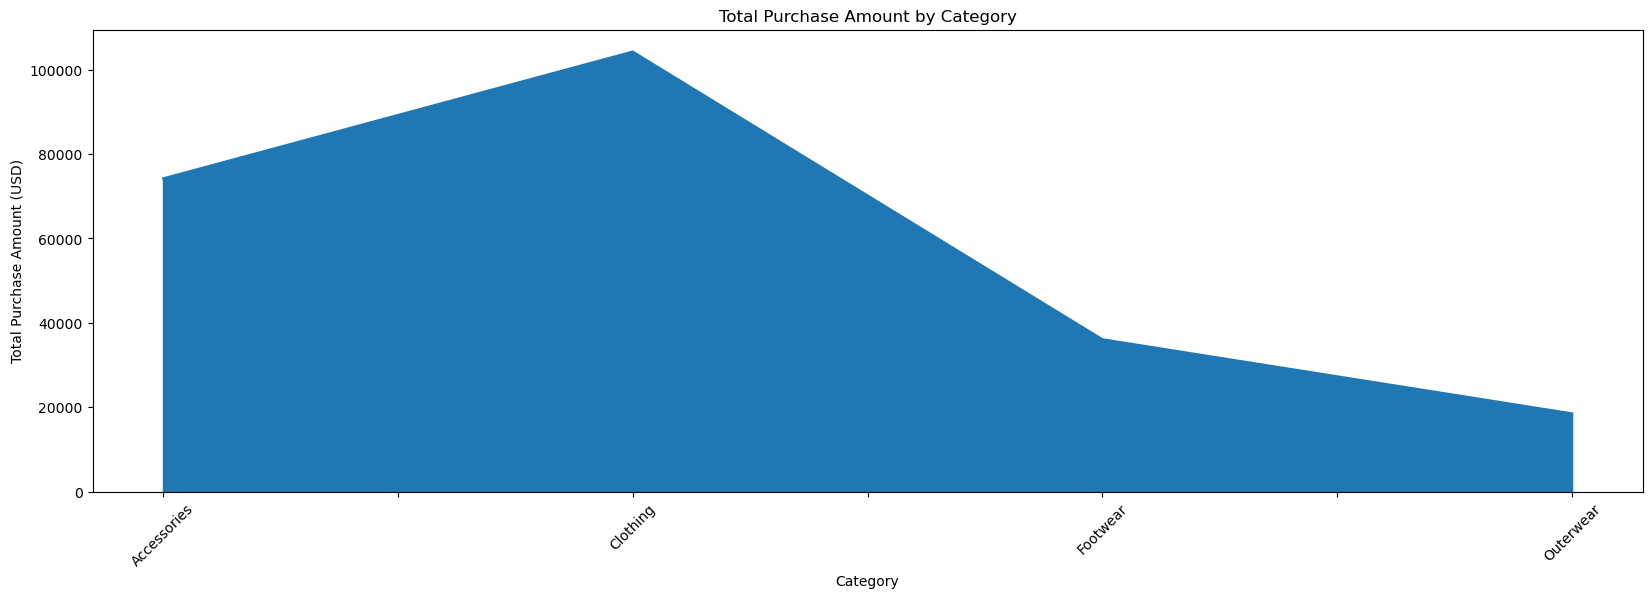

In [9]:
# area plot of total purchase amount by category
plt.figure(figsize=(20, 6))
category_purchase_total = df.groupby('Category')['Purchase_Amount_(USD)'].sum()

category_purchase_total.plot(kind='area')
plt.title('Total Purchase Amount by Category')
plt.xlabel('Category')
plt.ylabel('Total Purchase Amount (USD)')
plt.xticks(rotation=45)
plt.show()

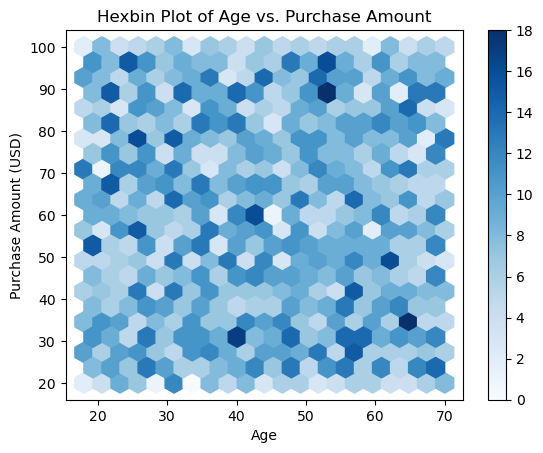

In [44]:
# hexbin plot of age vs purchase amount
plt.hexbin(df['Age'], df['Purchase_Amount_(USD)'], gridsize=20, cmap='Blues')
plt.title('Hexbin Plot of Age vs. Purchase Amount')
plt.xlabel('Age')
plt.ylabel('Purchase Amount (USD)')
plt.colorbar()
plt.show()

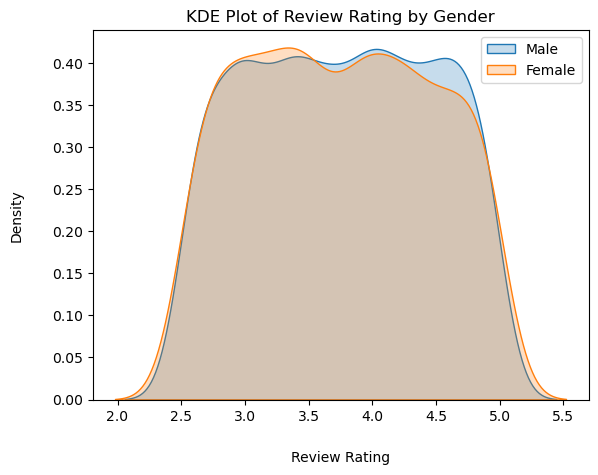

In [45]:
# kde plot of review rating by gender
sns.kdeplot(df[df['Gender'] == 'Male']['Review_Rating'], label='Male', fill=True)
sns.kdeplot(df[df['Gender'] == 'Female']['Review_Rating'], label='Female', fill=True)
plt.title('KDE Plot of Review Rating by Gender')
plt.xlabel('Review Rating', labelpad = 20)
plt.ylabel('Density', labelpad = 20)
plt.legend()
plt.show()

In [27]:
# get avg age of customers
avg_age = df['Age'].mean()
avg_age

44.06846153846154

In [33]:
# most common item ourchased
most_common_item = df['Item Purchased'].mode()[0]
most_common_item

'Blouse'

In [53]:
# total purch amt per category
total_purchase_per_category = df.groupby('Category')['Purchase Amount (USD)'].sum()
total_purchase_per_category

Category
Accessories     74200
Clothing       104264
Footwear        36093
Outerwear       18524
Name: Purchase Amount (USD), dtype: int64

In [54]:
# avg rating for male
avg_rating_male = df[df['Gender'] == 'Male']['Review Rating'].mean()
avg_rating_male


3.7539592760180995

In [45]:
# avg rating for female
avg_rating_female = df[df['Gender'] == 'Female']['Review Rating'].mean()
avg_rating_female

3.741426282051282

In [53]:
# most common payment method used by customers
most_common_payment_method = df['Payment Method'].mode()[0]
most_common_payment_method

'Credit Card'

In [60]:
# median purchase amount
median_purchase_amount = df['Purchase Amount (USD)'].median()
median_purchase_amount

60.0

In [64]:
# customers who are subscribers
subscriber_customer = df[df['Subscription Status'] == 'Yes']['Customer ID'].count()
subscriber_customer

1053

In [55]:
# avg purch amt with subscription and without
avg_purch_amt_subscribed = df.groupby('Subscription Status')['Purchase Amount (USD)'].mean()
avg_purch_amt_subscribed

Subscription Status
No     59.865121
Yes    59.491928
Name: Purchase Amount (USD), dtype: float64

In [75]:
# common season for purchases
most_common_season = df['Season'].mode()[0]
most_common_season

'Spring'

In [56]:
# total purch amt for male and female
total_purch_amt_male = df.groupby('Gender')['Purchase Amount (USD)'].sum()
total_purch_amt_male

Gender
Female     75191
Male      157890
Name: Purchase Amount (USD), dtype: int64

In [83]:
# avg age of customers who made purchases in the summer season
avg_age_summer = df[df['Season'] == 'Summer']['Age'].mean()
avg_age_summer

43.973821989528794

In [86]:
# how many customers used a promo code for their purchase
no_of_customer_with_promo_code = df[df['Promo Code Used'] == 'Yes']['Customer ID'].count()
no_of_customer_with_promo_code

1677

In [90]:
# what is the max rating in the dataset
max_rating = df['Review Rating'].max()
max_rating

5.0

In [89]:
# what is the min rating in the dataset
min_rating = df['Review Rating'].min()
min_rating

2.5

In [58]:
# most common shipping type with a review rating of 4 above
shipping_type_above_4 = df[df['Review Rating'] > 4]['Shipping Type'].mode()[0]
shipping_type_above_4

'Standard'

In [93]:
# how many customers have made more than 30 previous purchases
prev_purch_more_than30 = df[df['Previous Purchases'] > 30]['Customer ID'].count()
prev_purch_more_than30

1549

In [95]:
# avg purch amt with more than 30 prev purch
avg_purch_amt_with_more_than30 = df[df['Previous Purchases'] > 30]['Purchase Amount (USD)'].mean()
avg_purch_amt_with_more_than30

60.02840542285345

In [8]:
# most common payment method for customers who shop in winter season
most_common_payment_method_winter = df[df['Season']  == 'Winter']['Payment Method'].mode()[0]
most_common_payment_method_winter

'Credit Card'

In [9]:
# total purch amt with a 'free shipping' shipping type
total_purch_amt_free_shipping = df[df['Shipping Type'] == 'Free Shipping']['Purchase Amount (USD)'].sum()
total_purch_amt_free_shipping

40777

In [27]:
# avg purch amt who used discount
avg_purch_amt_with_discount = df[df['Discount Applied'] == 'Yes']['Purchase Amount (USD)'].mean()
avg_purch_amt_with_discount

59.27906976744186

In [61]:
# # avg purch amt who used discount but purch amt is greater than 80  --numpy try in sql
# avg_purch_amt_with_discount = np.where((df['Discount Applied'] == 'Yes') & (df['Purchase Amount (USD)'] > 80))
# q = np.mean(avg_purch_amt_with_discount)
# q
avg_purch_amt_with_discount = df[(df['Discount Applied'] == 'Yes') & (df['Purchase Amount (USD)'] > 80)]['Purchase Amount (USD)'].mean()
avg_purch_amt_with_discount

90.48009950248756

In [49]:
# most common category of items by female customers with a review rating of below 3
most_common_category_by_female_with_rating_below3 = df[(df['Gender'] == 'Female') & (df['Review Rating'] < 3)]['Category'].mode()[0]
most_common_category_by_female_with_rating_below3

'Clothing'

In [56]:
# avg age of customers who made purchases with a review rating above 4 and used a promo code
getValue = df[(df['Review Rating'] > 4) & (df["Promo Code Used"] == 'Yes')]['Age'].mean()
getValue

43.9872

In [57]:
# total purch amt for customers in each location
getValue = df.groupby('Location')['Purchase Amount (USD)'].sum()
getValue

Location
Alabama           5261
Alaska            4867
Arizona           4326
Arkansas          4828
California        5605
Colorado          4222
Connecticut       4226
Delaware          4758
Florida           3798
Georgia           4645
Hawaii            3752
Idaho             5587
Illinois          5617
Indiana           4655
Iowa              4201
Kansas            3437
Kentucky          4402
Louisiana         4848
Maine             4388
Maryland          4795
Massachusetts     4384
Michigan          4533
Minnesota         4977
Mississippi       4883
Missouri          4691
Montana           5784
Nebraska          5172
Nevada            5514
New Hampshire     4219
New Jersey        3802
New Mexico        5014
New York          5257
North Carolina    4742
North Dakota      5220
Ohio              4649
Oklahoma          4376
Oregon            4243
Pennsylvania      4926
Rhode Island      3871
South Carolina    4439
South Dakota      4236
Tennessee         4772
Texas             4712
Ut

In [60]:
# avg purch amt for customers who have a subs and used Venmo as payment method
getValue = df[(df['Subscription Status'] == 'Yes') & (df['Payment Method'] == 'Venmo')]['Purchase Amount (USD)'].mean()
getValue

60.71264367816092

In [61]:
# frequency distribution of the 'Frequency Distribution of Purchases' column
getValue = df['Frequency of Purchases'].value_counts()
getValue

Frequency of Purchases
Every 3 Months    584
Annually          572
Quarterly         563
Monthly           553
Bi-Weekly         547
Fortnightly       542
Weekly            539
Name: count, dtype: int64

In [62]:
# avg purch amt for each color of items
getValue = df.groupby('Color')['Purchase Amount (USD)'].mean()
getValue

Color
Beige        60.414966
Black        58.401198
Blue         56.953947
Brown        59.063830
Charcoal     60.633987
Cyan         61.891566
Gold         61.007246
Gray         62.490566
Green        65.704142
Indigo       56.251701
Lavender     59.129252
Magenta      57.131579
Maroon       59.525316
Olive        58.146893
Orange       60.889610
Peach        59.187919
Pink         60.588235
Purple       60.013245
Red          59.317568
Silver       56.832370
Teal         60.808140
Turquoise    55.613793
Violet       61.716867
White        62.640845
Yellow       59.241379
Name: Purchase Amount (USD), dtype: float64

In [70]:
# most common payment method for customers who purchased items in the fall season
getValue = df[df['Season'] == 'Fall']['Payment Method'].mode()[0]
getValue

'Credit Card'

In [73]:
# how many customers have made a purchase in each category
getValue = df['Category'].value_counts()
getValue

Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64

In [77]:
# avg age of customers who purchased accessories with a discount applied
getValue = df[(df['Category'] == 'Accessories') & (df['Discount Applied'] == 'Yes')]['Age'].mean()
getValue

44.23941068139963

In [86]:
# total purch amt for each size of clothing items (XL, L, M, S)
getValue = df[df['Category'] == 'Clothing'].groupby('Size')['Purchase Amount (USD)'].sum()
getValue

Size
L     27864
M     47041
S     17416
XL    11943
Name: Purchase Amount (USD), dtype: int64

In [5]:
# total purch amt for customers who have made more than 40 previous purchases
getValue = df[df['Previous Purchases'] > 40]['Purchase Amount (USD)'].sum()
getValue

46590

In [65]:
# most common location for customers who purchased socks with a discount applied
getValue = df[(df['Item Purchased'] == 'Socks') & (df['Discount Applied'] == 'Yes')]['Location'].mode()[0]
getValue

'Georgia'

In [20]:
# avg purch amt for customers who have subsciprtion and used Venmo as payment method but did not used a promo code
getValue = df[(df['Subscription Status'] == 'Yes') & (df['Payment Method'] == 'Venmo') & (df['Promo Code Used'] == 'No')]['Purchase Amount (USD)'].mean()
getValue

nan

In [22]:
# most common item purch by customer in louisiana with a review rating of 4 or higher
getValue = df[(df['Location'] == 'Louisiana') & (df['Review Rating'] >= 4)]['Item Purchased'].mode()[0]
getValue

'Sweater'

In [24]:
# total purch amt f0r customers who made purchases in fall season and used credit card as the mode of payment
getValue = df[(df['Season'] == "Fall") & (df['Payment Method'] == 'Credit Card')]['Purchase Amount (USD)'].sum()
getValue

11411

In [67]:
# most common category of items purch by male customers in the winter season with a review rating below 3
getValue = df[(df['Gender'] == 'Male') & (df['Season'] == 'Winter') & (df['Review Rating'] < 3)]['Category'].mode()[0]
getValue

'Clothing'

In [27]:
# how many customers with subscription status of 'Yes' and used a promo code for their purchase
getValue = df[(df['Subscription Status'] == 'Yes') & (df['Promo Code Used'] == 'Yes')]['Customer ID'].count()
getValue

1053

In [30]:
# correlation between a customer' age and their total previous purchases, calculate using the pearson correlation coefficient
getCorr = df['Age'].corr(df['Previous Purchases'], method = 'pearson')
getCorr

0.04044453114289466

In [23]:
df.sample(3)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
260,261,38,Male,Hat,Accessories,57,Montana,S,Red,Winter,3.2,Yes,Bank Transfer,2-Day Shipping,Yes,Yes,11,Credit Card,Every 3 Months
3825,3826,49,Female,Shorts,Clothing,35,Hawaii,L,Green,Fall,4.1,No,Bank Transfer,Express,No,No,47,Debit Card,Fortnightly
1359,1360,27,Male,Hoodie,Clothing,68,North Carolina,S,Cyan,Winter,4.3,No,Debit Card,Store Pickup,Yes,Yes,26,Bank Transfer,Fortnightly
